In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import plotly.graph_objs as go
#import plotly.offline as py
#py.init_notebook_mode(connected=True)


from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:
n = 3000000 #number of records in file
s = 30000 #desired sample size
filename = "../Data/amazon_review_full_csv/train.csv"
skip = sorted(random.sample(range(n),n-s))

data_df = pd.read_csv(filename, header=None,skiprows=skip)

In [3]:
data_df.head()

,0,1,2
0,2,Will not be purchasing another one of these,It worked fine in the beginning. 2 months or s...
1,2,ghetto foolishness,"i like the Hot Boys and really like Juvenile, ..."
2,1,I guess it was a mystery,"In a word, Lacking. Her style of writing left ..."
3,2,To contrived and therefore not plausible,I found this plot to be to contrived in that m...
4,1,A historical gem whose title obscures its intent,Started laughing in the second chapter....enjo...


In [9]:
data_df.columns =['Rating','Review Title', 'Review Text']

In [10]:
data_df.head()

,Rating,Review Title,Review Text
0,2,Will not be purchasing another one of these,It worked fine in the beginning. 2 months or s...
1,2,ghetto foolishness,"i like the Hot Boys and really like Juvenile, ..."
2,1,I guess it was a mystery,"In a word, Lacking. Her style of writing left ..."
3,2,To contrived and therefore not plausible,I found this plot to be to contrived in that m...
4,1,A historical gem whose title obscures its intent,Started laughing in the second chapter....enjo...


In [11]:
data_df.shape

(30000, 3)

In [19]:
data_df['Rating'].nunique()

5

(array([ 0.49975   ,  0.        ,  0.49683333,  0.        ,  0.        ,
         0.50183333,  0.        ,  0.49291667,  0.        ,  0.50866667]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

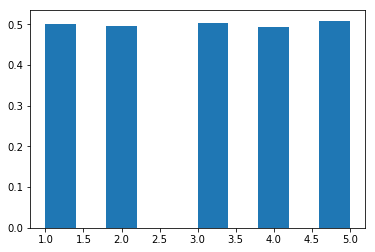

In [23]:
plt.hist(data_df['Rating'], align='mid', normed=1)

In [12]:
# Converting rating into Binary class
data_df['Rating']= data_df['Rating'].replace([1,2],0)
data_df['Rating']= data_df['Rating'].replace([3,4,5],1)

(array([ 12113.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17887.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

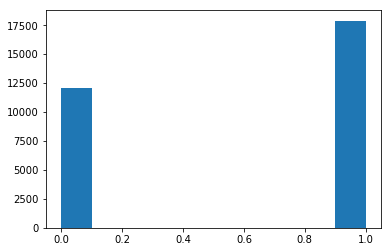

In [13]:
plt.hist(data_df['Rating'], align='mid')


In [16]:
example = data_df['Review Text'][2].lower()
example

'in a word, lacking. her style of writing left me unable to appreciate the underlying story which, as a result, i found rather vacuous and inauthentic. so much so that i felt compelled to come write a review of this book so others might avoid making the same mistake i did. no offence patricia.'

In [21]:
example_count=CountVectorizer().build_tokenizer()(example)
print (example_count)

['in', 'word', 'lacking', 'her', 'style', 'of', 'writing', 'left', 'me', 'unable', 'to', 'appreciate', 'the', 'underlying', 'story', 'which', 'as', 'result', 'found', 'rather', 'vacuous', 'and', 'inauthentic', 'so', 'much', 'so', 'that', 'felt', 'compelled', 'to', 'come', 'write', 'review', 'of', 'this', 'book', 'so', 'others', 'might', 'avoid', 'making', 'the', 'same', 'mistake', 'did', 'no', 'offence', 'patricia']


In [22]:
pd.DataFrame([[x,example_count.count(x)] for x in set(example_count)], columns=['Word','Count'])

,Word,Count
0,come,1
1,unable,1
2,patricia,1
3,result,1
4,this,1
5,offence,1
6,word,1
7,writing,1
8,same,1
9,underlying,1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df['Review Text'], data_df['Rating'], test_size =0.2, random_state=0)

In [32]:
print (X_train.shape)

(24000,)


In [31]:
# Counting the words of train set
basicVectorizer=CountVectorizer()
basicTrain=basicVectorizer.fit_transform(X_train)
print(basicTrain.shape)


(24000, 53489)


In [36]:
# LogisticRegression
basicModel=LogisticRegression()
basicModel= basicModel.fit(basicTrain, y_train)

In [37]:
# Counting the words of test set

basicTest=basicVectorizer.transform(X_test)
print(basicTest.shape)

predictions= basicModel.predict(basicTest)

(6000, 53489)


In [38]:
pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,1666,753
1,649,2932


In [41]:
print ("test score: ", roc_auc_score(y_test,predictions))

test score:  0.753740026337


In [51]:
basicwords= basicVectorizer.get_feature_names()
basiccoeffs=basicModel.coef_.tolist()[0]
coeff_df= pd.DataFrame({'Word': basicwords, 'Coefficient':basiccoeffs})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending =[0,1])
coeff_df.head(10)

,Coefficient,Word
52624,1.779284,wonderfully
16536,1.726812,entertaining
35801,1.552349,pleased
37297,1.508815,protected
34954,1.434673,perfect
50114,1.409239,unremarkable
34300,1.407734,paperwork
22106,1.395241,haunting
22430,1.329236,helps
12576,1.328034,dave


In [53]:
coeff_df.tail(10)

,Coefficient,Word
5043,-1.663574,barely
23132,-1.687743,horrible
52782,-1.712795,worthless
47296,-1.765476,terrible
45892,-1.795621,sucks
14090,-1.810273,disappointment
50438,-1.817738,useless
51695,-1.844153,waste
36149,-1.888396,poorly
52774,-2.288557,worst


In [62]:
# n-gram model
advancedvectorizer = CountVectorizer(ngram_range=(2,2))
advancedtrain = advancedvectorizer.fit_transform(X_train)

In [63]:
print(advancedtrain.shape)

(24000, 577282)


In [64]:
# LogisticRegression
advancedModel=LogisticRegression()
advancedModel= advancedModel.fit(advancedtrain, y_train)

In [65]:
advancedTest=advancedvectorizer.transform(X_test)
print(advancedTest.shape)

predictions= advancedModel.predict(advancedTest)

(6000, 577282)


In [66]:
pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,1602,817
1,535,3046


In [67]:
print ("test score: ", roc_auc_score(y_test,predictions))

test score:  0.756428760999


In [69]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=2)
clf=clf.fit(advancedtrain, y_train)

rf_predictions= clf.predict(advancedTest)
pd.crosstab(y_test, rf_predictions, rownames=["Actual"], colnames=["Predicted"])


Predicted,1
Actual,
0,2419
1,3581


In [70]:
print ("test score: ", roc_auc_score(y_test,rf_predictions))

test score:  0.5


In [71]:
# SVC
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=0.025)#, gamma=2)

clf=clf.fit(advancedtrain, y_train)

svc_predictions= clf.predict(advancedTest)
pd.crosstab(y_test, svc_predictions, rownames=["Actual"], colnames=["Predicted"])


Predicted,0,1
Actual,,
0,1483,936
1,445,3136


In [72]:
print ("test score: ", roc_auc_score(y_test,svc_predictions))

test score:  0.744398142371
